# SymbolicBayesTreeClique

A `SymbolicBayesTreeClique` represents a single node within a `SymbolicBayesTree`. Each clique corresponds to a set of variables (frontal variables) that were eliminated together during the multifrontal elimination process.

Key aspects of a clique:
*   **Conditional:** It stores the `SymbolicConditional` P(Frontals | Parents/Separator) that results from eliminating the frontal variables.
*   **Tree Structure:** It maintains pointers to its parent and children cliques within the Bayes Tree, defining the tree's topology.
*   **Frontal and Separator Variables:** Implicitly defines the frontal variables (eliminated in this clique) and separator variables (parents in the Bayes Tree, connecting it to its parent clique).

Users typically interact with the `SymbolicBayesTree` as a whole, but understanding the clique structure is helpful for comprehending how the Bayes Tree represents the factored distribution and facilitates efficient inference.

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/symbolic/doc/SymbolicBayesTreeClique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet gtsam-develop

In [11]:
from gtsam import SymbolicFactorGraph, Ordering
# SymbolicBayesTreeClique is accessed *through* a SymbolicBayesTree
from gtsam.symbol_shorthand import X, L
import graphviz

## Accessing and Inspecting Cliques

Cliques are obtained by first creating a `SymbolicBayesTree` (usually via elimination) and then accessing its nodes.

Bayes Tree has 4 cliques.
Number of roots: 1


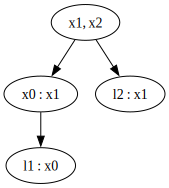

In [16]:
# Create a factor graph
graph = SymbolicFactorGraph()
graph.push_factor(X(0))
graph.push_factor(X(0), X(1))
graph.push_factor(X(1), X(2))
graph.push_factor(X(0), L(1))
graph.push_factor(X(1), L(2))

# Eliminate to get a Bayes Tree
ordering = Ordering.ColamdSymbolicFactorGraph(graph)
bayes_tree = graph.eliminateMultifrontal(ordering)

print(f"Bayes Tree has {bayes_tree.size()} cliques.")

roots = bayes_tree.roots()
print(f"Number of roots: {len(roots)}")

# Visualize the Bayes tree using graphviz
display(graphviz.Source(bayes_tree.dot()))

In [17]:
def inspect(clique):
    print("\nInspecting Clique 0:")
    clique.print("  Clique Structure: ")
    
    # Get the conditional stored in the clique
    conditional = clique.conditional()
    if conditional:
        conditional.print("  Associated Conditional: P(")
    else:
        print("  Clique has no associated conditional (might be empty root)")
        
    # Check properties
    print(f"  Is Root? {clique.isRoot()}")
    # Accessing parent/children is possible in C++ but might be less direct or typical in Python wrapper usage
    # Parent clique (careful, might be null for root)
    parent_clique = clique.parent() 
    if parent_clique:
        print("  Parent Clique exists.")
    else:
        print("  Parent Clique is None (likely a root clique).")
        
    print(f"  Number of Children: {clique.nrChildren()}") # Example if method existed

def traverse_clique(clique):
    inspect(clique)
    for j in range(clique.nrChildren()):
        traverse_clique(clique[j])

for root in roots:
    traverse_clique(root)


Inspecting Clique 0:
  Clique Structure:  P( x1 x2)
  Associated Conditional: P( P( x1 x2)
  Is Root? True
  Parent Clique is None (likely a root clique).
  Number of Children: 2

Inspecting Clique 0:
  Clique Structure:  P( x0 | x1)
  Associated Conditional: P( P( x0 | x1)
  Is Root? False
  Parent Clique exists.
  Number of Children: 1

Inspecting Clique 0:
  Clique Structure:  P( l1 | x0)
  Associated Conditional: P( P( l1 | x0)
  Is Root? False
  Parent Clique exists.
  Number of Children: 0

Inspecting Clique 0:
  Clique Structure:  P( l2 | x1)
  Associated Conditional: P( P( l2 | x1)
  Is Root? False
  Parent Clique exists.
  Number of Children: 0
